In [1]:
import os, json
import numpy as np

# walk = sorted(os.walk("."), key=lambda x: x[0])[::-1]
# for dirpath, dirnames, filenames in walk:
#     if "testingSetScores.json" in filenames:
#         data = json.load(open(os.path.join(dirpath, "testingSetScores.json"), "r"))
#         # sort data
#         data = dict(sorted(data.items(), key=lambda x: x[1]["ID"]))
#         deltas = []
#         for k in data:
#             initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
#             optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
#             delta = optimized_prompt_score - initial_prompt_score
#             deltas.append(delta)
            
#         print(deltas)
#         avg_change = sum(deltas) / len(deltas)
#         print(f"Avg change: {dirpath}: {avg_change}")
        
        
with open("testingSetScores.json", "r") as f:
    data = json.load(f)
    deltas = []
    for k in data:
        initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
        optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
        delta = optimized_prompt_score - initial_prompt_score
        deltas.append(delta)
        
    print(deltas)
    avg_change = np.mean(deltas)
    std = np.std(deltas)
    ci = 1.96 * std / np.sqrt(len(deltas))
    print(f"Avg change: {avg_change}")
    print(f"Std: {std}")
    print(f"95% CI: {ci}")
    
    # Plot the points on a vertical line with the confidence interval
    # import matplotlib.pyplot as plt
    # xs = np.zeros(len(deltas))
    # plt.figure()
    # plt.errorbar(xs, deltas, yerr=ci, fmt='o')
    # plt.show()

[25.790253614209867, 15.978317742268572, 16.76469721397428, 40.85782957966079, 10.30306609692462, 3.0488656864818253, 16.51771755712863, 9.631440213812624, 35.24696034480373, 12.627044117389225, 12.925720726612884, 4.513406573503389, 20.709408152581155, 8.620236368716334, 74.77678953692632, 6.978444206148012, 9.112391120158954, 0.12595162737889254, 28.77568716416252, 3.0189031793368812, 0.9519512608850818, 13.530788273195611, 11.796727764846025, 12.337175562035718, 64.78282675361386, 5.848670368713599, 16.05801395382966, 40.18286690006984, 31.737429164463403, 46.41927049515445, 3.394392372854547, 2.1789772378084535, 0.38711749388990313, 14.80319544515805, 0.1194664175403588, 20.305855416329123]
Avg change: 17.809940436182423
Std: 17.459980485475626
95% CI: 5.703593625255372


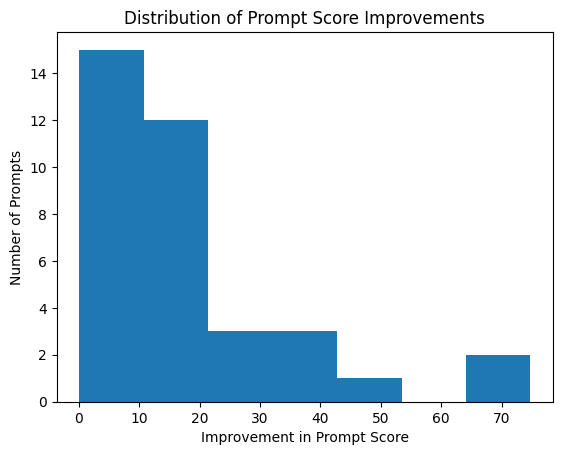

In [2]:
import matplotlib.pyplot as plt
plt.hist(deltas, bins=7)
plt.xlabel("Improvement in Prompt Score")
plt.ylabel("Number of Prompts")
plt.title("Distribution of Prompt Score Improvements")
plt.show()

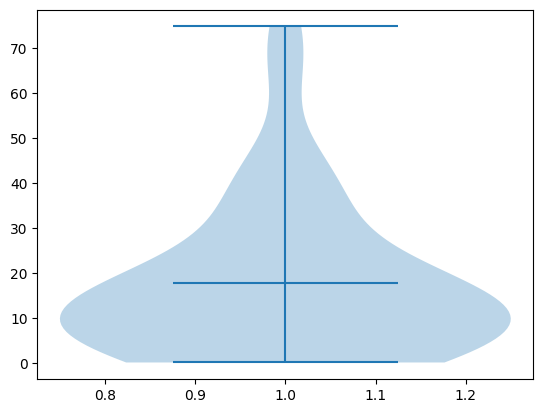

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.violinplot(deltas, showmeans=True)
plt.show()